<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Twitter Data</h1>

<hr>


### ☑️ Objectives
At the end of this session, you will be able to:
- [ ] Understand how to find and run pre-trained models
- [ ] Evaluate results from pre-trained models
- [ ] Run a pre-trained model using real twitter data


### 🔨 Pre-Assignment

Create a new Conda environment for sentiment anaylsis (sa)

```bash
  conda create -n sa python=3.8 jupyter -y
```

Activate your new environment
```bash
  conda activate sa
```

Open the jupyter-notebook
```bash
  jupyter-notebook
```

Navigate through the repo in the notebook to find `imports.ipynb` for this week and open it.

Run all of the cells in the notebook.


### Background
Please review the weekly narrative [here](https://www.notion.so/Week-2-Data-Centric-AI-the-AI-Product-Lifecycle-72a84c1517b44fcbb3e6bd11d47477dc#2b73937612bb46559f5b91dc2bf55e7d)




<hr>

## 🚀 Let's Get Started

Let's first start with our imports

In [19]:
!pip install transformers tensorflow torch pandas numpy matplotlib seaborn

In [20]:
import csv # Allows us to read and write csv files
from pprint import pprint # Make our print functions easier to read

from transformers import pipeline # Hugging face pipeline to load online models

🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:
- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.

- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

This is the pipeline method in transformers that we'll be using to analyze our sentiment data. Since we're not specifying a pretrained model, the pipeline has a default sentiment analysis model called [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).

In [21]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In this example, we'll supply two polar sentiments and test out the model pipeline.

In [22]:
data = ["This is great!", "Oh no!"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.994263231754303}]

The `label` in this case indicates the prediction for the sentiment type.

The `score` indicates the confidence of the prediction (between 0 and 1).

Since our sentiments were very polar, it was easier for the model to predict the sentiment type.

Let's see what happens when we use a less clear example:

In [23]:
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?"]
sentiment_pipeline(challenging_sentiments)

[{'label': 'NEGATIVE', 'score': 0.9955562949180603},
 {'label': 'NEGATIVE', 'score': 0.9860844016075134}]

<hr>

### Loading the Twitter Data

Let's play with some twitter data. We'll be using a modified version of the [Elon Musk twitter dataset on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets).

In [24]:
with open('../data/elonmusk_tweets.csv', newline='', encoding='utf8') as f:
    tweets=[]
    reader = csv.reader(f)
    twitter_data = list(reader)
    for tweet in twitter_data:
        tweets.append(tweet[0])

    print(tweets[:100])

['@vincent13031925 For now. Costs are decreasing rapidly.', 'Love this beautiful shot', '@agnostoxxx @CathieDWood @ARKInvest Trust the shrub', 'The art In Cyberpunk is incredible', '@itsALLrisky 🤣🤣', '@seinfeldguru @WholeMarsBlog Nope haha', '@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar', '@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many missions', 'Blimps rock  https://t.co/e8cu5FkNOI', '@engineers_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder.', '@DrPhiltill Good thread', '@alexellisuk Pretty much', '@tesla_adri @WholeMarsBlog These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.', '@WholeMarsBlog Sensors are a bitstream and camera

First things first - let's look at the sentiment as determined by the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) (default model) in the pipeline.

In [25]:
distil_sentiment = sentiment_pipeline(tweets[0:100])

Let's check out the distribution of positive/negative Tweets and see the breakdown using Python's 🐍 standard library `collections.Counter`!

In [26]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in distil_sentiment])
pos_sent_count = tweet_distro['POSITIVE']
neg_sent_count = tweet_distro['NEGATIVE']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

49 (49.00%) of the tweets classified are positive.
51 (51.00%) of the tweets classified are negative.


Let's do that process again, but use a model with an additional potential label "NEUTRAL" called [bertweet-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

To start - we'll build a pipeline with the new model by using the 🤗 Hugging Face address: `finiteautomata/bertweet-base-sentiment-analysis`

In [27]:
bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Next, and the same as before, let's run the analysis on 100 of Elon's tweets.

In [28]:
bert_sentiment = bertweet_pipeline(tweets[0:100])

And then, let's check out the breakdown of positive, negative, AND neutral sentiments!

In [29]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in bert_sentiment])
pos_sent_count = tweet_distro['POS']
neu_sent_count = tweet_distro['NEU']
neg_sent_count = tweet_distro['NEG']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neu_sent_count} ({neu_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are neutral.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

29 (29.00%) of the tweets classified are positive.
64 (64.00%) of the tweets classified are neutral.
7 (7.00%) of the tweets classified are negative.


In [53]:
# print(sentiment_pipeline('The movie was filmed in black and white.'))
# print(sentiment_pipeline('The movie was filmed in white.'))
# print(sentiment_pipeline('The movie was filmed in yellow.'))
# print(sentiment_pipeline('The movie was filmed in yellow hue.'))
print(sentiment_pipeline('The movie was filmed in blue.'))
print(sentiment_pipeline('The movie was filmed in blue hue.'))
print(sentiment_pipeline('The movie was filmed in hue blue.'))
print(sentiment_pipeline('The movie was filmed in green.'))
print(sentiment_pipeline('The movie was filmed in green hue.'))
print(sentiment_pipeline('The movie was filmed in hue green.'))
print(sentiment_pipeline('The movie was filmed in color.'))

[{'label': 'NEGATIVE', 'score': 0.7392895817756653}]
[{'label': 'POSITIVE', 'score': 0.9147318601608276}]
[{'label': 'POSITIVE', 'score': 0.8655577301979065}]
[{'label': 'POSITIVE', 'score': 0.7585821151733398}]
[{'label': 'POSITIVE', 'score': 0.9918442368507385}]
[{'label': 'POSITIVE', 'score': 0.9732118248939514}]
[{'label': 'POSITIVE', 'score': 0.9532566666603088}]


There is a strong bias when refering to colors as good or bad. The word and Black and white are both considered negative whilst the color shows that is positive. Also is the notion of sentiment that black and white films are negative does not align with Charlie Chaplin or Fellini fans. There is hint that there is a bias towards blue vs. yellow and the context is not being considered. Yellow is closer to sepia and yet green hue is strongly positive. This is leaning a lot towards randomness and biases that it is trained. Filmakers love green lit projects for a reason :). Also the sa seems to focusing on the individual words considerably more than the context of the sentence. We demonstrate this with the contrasting results between Green and Blue color films, hue and then ordered differently in the sentence. 

In [56]:
bertweet_pipeline('The movie was filmed in black and white.')
print(bertweet_pipeline('The movie was filmed in black and white.'))
print(bertweet_pipeline('The movie was filmed in white.'))
print(bertweet_pipeline('The movie was filmed in yellow.'))
print(bertweet_pipeline('The movie was filmed in yellow hue.'))
print(bertweet_pipeline('The movie was filmed in blue.'))
print(bertweet_pipeline('The movie was filmed in blue hue.'))
print(bertweet_pipeline('The movie was filmed in hue blue.'))
print(bertweet_pipeline('The movie was filmed in green.'))
print(bertweet_pipeline('The movie was filmed in green hue.'))
print(bertweet_pipeline('The movie was filmed in hue green.'))
print(bertweet_pipeline('The movie was filmed in color.'))

[{'label': 'NEU', 'score': 0.9514453411102295}]
[{'label': 'NEU', 'score': 0.9739975929260254}]
[{'label': 'NEU', 'score': 0.9757979512214661}]
[{'label': 'NEU', 'score': 0.9802277684211731}]
[{'label': 'NEU', 'score': 0.9790879487991333}]
[{'label': 'NEU', 'score': 0.9800349473953247}]
[{'label': 'NEU', 'score': 0.9764659404754639}]
[{'label': 'NEU', 'score': 0.9726836085319519}]
[{'label': 'NEU', 'score': 0.9803494215011597}]
[{'label': 'NEU', 'score': 0.9728480577468872}]
[{'label': 'NEU', 'score': 0.9792335629463196}]


In Bert it is strongly nuetral which makes sense , and much narrower , and no sentiment associated on the colors and that is improving on distill bert. And that is interesting to color therapy and calmer themes on green and blue and the soft color for sentiment. Each color is just a wave and frequency and non-humans may perceive. 

In [64]:
# Code created to 
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
tweets_filtered = tweets[:100]

df = pd.DataFrame(tweets_filtered, columns=['tweet'])
df['label_distil'] = [x['label'] for x in distil_sentiment]
df['score_distil'] = [x['score'] for x in distil_sentiment]
df['label_bert'] = [x['label'] for x in bert_sentiment]
df['score_bert'] = [x['score'] for x in bert_sentiment]

We analysed the top mismatches such that the two models could be compared and contrasted to highlight the biggest variances between. 

In [62]:
df.loc[df['label_bert'] == 'NEG', :].sort_values(by=['score_bert'], ascending=False)

,tweet,label_distil,score_distil,label_bert,score_bert
15,@WholeMarsBlog This is a major problem!,NEGATIVE,0.999600,NEG,0.980315
4,@itsALLrisky 🤣🤣,NEGATIVE,0.983950,NEG,0.962732
20,@itsALLrisky 💯,NEGATIVE,0.983950,NEG,0.962206
96,@GerberKawasaki I fried a lot of neurons on that problem!,NEGATIVE,0.992092,NEG,0.960584
18,But wait how is the core of the earth lit by the sun? Stop asking questions!!,NEGATIVE,0.998437,NEG,0.805101
19,Kong vs Godzilla has record for most meth ever consumed in a writer’s room,POSITIVE,0.621601,NEG,0.763041
51,First @Neuralink product will enable someone with paralysis to use a smartphone with their mind faster than someone using thumbs,NEGATIVE,0.995486,NEG,0.760998


Negatives by distillbert and then pick up easily the divergence between distillbert and specialized BertTweet.

In [63]:
df.loc[(df['label_bert'] == 'NEU')
       & (df['label_distil'] == 'NEGATIVE'), :].sort_values(by=['score_distil'], ascending=True)

,tweet,label_distil,score_distil,label_bert,score_bert
74,"@ID_AA_Carmack Some kind of ELO level, updated once or twice a year based on what someone actually got done, might be most effective. Important that it go both up *and* down.",NEGATIVE,0.539766,NEU,0.720872
56,"@jordanxmajel @WatchersTank @SpaceX Shock absorption is built into tower arms. Since tower is ground side, it can use a lot more mass to arrest booster downward momentum.",NEGATIVE,0.679888,NEU,0.952736
82,@EvaFoxU Last Kingdom vs Vikings,NEGATIVE,0.761927,NEU,0.977231
80,"The Earth is not flat, it’s a hollow globe &amp; Donkey King lives there!",NEGATIVE,0.809989,NEU,0.954809
2,@agnostoxxx @CathieDWood @ARKInvest Trust the shrub,NEGATIVE,0.849833,NEU,0.973386
60,@MarkJam93765764 @IvanEscobosa A tidal wave of vaccine is being produced!,NEGATIVE,0.898113,NEU,0.908238
12,@tesla_adri @WholeMarsBlog These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.,NEGATIVE,0.914252,NEU,0.933398
62,@IvanEscobosa Latter,NEGATIVE,0.926800,NEU,0.978084
73,@CathieDWood @wintonARK @ARKInvest What do you think of the unusually high ratio of S&amp;P market cap to GDP?,NEGATIVE,0.940365,NEU,0.945433
27,@Adamklotz_ @OwenSparks_ @WholeMarsBlog Yup,NEGATIVE,0.949726,NEU,0.932738


❓ What do you notice about the difference in the results? 

![image](../deliverables/bert-distil-negative-mismatch.png "A title is required")

❓ Do the results for the `bertweet-base` model look better, or worse, than the results for the `distilbert-base` model? Why?

> The results picked up from `bertweet-base` model look better because the `distilbert-base` is not trained on data that is specific to the source and purpose of twitting. In short, we think that Twitter has its own language or atleast a dialect  which differs from the common use of the English language. Additionally, Twitter itslef has sub-cultures that are represented within them, for example, movies filmed in Colombia are flagged as negative vs. films filmed in Bollywood. This could be dictated solely in the number of tweets and have nothing pertaining to the underlying quality, emotion or sentiment.  Despite both models are trained for the same task, it seems that `distilbert-base` has been trained on data that might have context biased evaluations as noted by the developer of the model. 

<hr>

### Partner Exercise

With your partner, try and determine what the following tweets might be classified as. Try to classify them into the same groups as both of the model pipelines we saw today - and try adding a few of your own sentences/Tweets! 

In [68]:
example_difficult_tweets = [
     # Some tweets from https://mashable.com/article/best-tweets-of-the-year-2022, Humor or Funiness would lend itslef well to analysing sentinment models 
    # the ones that are not yet deleted by Elon
    "email was a mistake. we shouldn’t be able to communicate this quickly. if my husband died at Gettysburg, that's not my business until next spring.",
    "hi I’m Kendall Roy and this is, uh, the fucking Disney channel",
    "the tv is very good, the world is very bad: the 2022 story",
    "a shrimp? am i to accept, as god's own truth, that the sea's very own abominable and chittering roach, was the one who took wok into hand and fried this rice?",
   "You don't see a lot of brown cars anymore. When I was a kid it was just doodoo brown Oldsmobiles all over" ,
   "There are many success stories but one bad apple can ruin the cart"

    
    
    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
    "We could replace people with robots.",
    "We should replace people with robots.",
    "We will replace people with robots.",
    "We will replace people with robots! 🤣",
    "Elden Ring is not a copy of Skyrim.",
     "Elden Ring is a copy of Skyrim.",
     "Austin bats are wonderful.",
     "Austin bats are worth watching.",
     "Jeff Bezos is better than Elon Musk.",
    "Snowboarding is fun and risky.",
    "Snowboarding is fun but risky.",
    "Snowboarding is fun but dangerous.",
     "Why liberal Washington can't quit Twitter",
     "Until there is a viable alternative, I will be at Twitter and you will have to pry my fingers from my phone.",
     "Humans are simply not built for email.",
   
]

The `distilbert-base` model:

In [69]:
for tweet in example_difficult_tweets:
    pprint(sentiment_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'NEGATIVE', 'score': 0.9996814727783203}]
email was a mistake. we shouldn’t be able to communicate this quickly. if my husband died at Gettysburg, that's not my business until next spring.

[{'label': 'NEGATIVE', 'score': 0.9853712320327759}]
hi I’m Kendall Roy and this is, uh, the fucking Disney channel

[{'label': 'NEGATIVE', 'score': 0.9924982190132141}]
the tv is very good, the world is very bad: the 2022 story

[{'label': 'NEGATIVE', 'score': 0.9986578226089478}]
a shrimp? am i to accept, as god's own truth, that the sea's very own abominable and chittering roach, was the one who took wok into hand and fried this rice?

[{'label': 'NEGATIVE', 'score': 0.9980429410934448}]
You don't see a lot of brown cars anymore. When I was a kid it was just doodoo brown Oldsmobiles all over

[{'label': 'POSITIVE', 'score': 0.5429078936576843}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEGATIVE', 'score': 0.634838342666626}]
@ashleevance Ba

For Distill-Bert
We looked at multiple difficult tweets and also came up with our own sentences or imaginary but completely likely tweets. Another novel approach was to test the models on the top 10 funniest/sarcastic/"best" tweets as per mashable.com. The results were interestingly strongly negative for these tweets. Some other considerations into the NLP side of things words that indicate probability or liklihood, for example, "should" have, "could" have and "will" have replaced humans by robts were negative. The example of negation and double negation were both interestingly strongly negative as well, as one would assume whether Elden Ring is palagarised or not from Skyrim would also have negative or postive sentiments. Controversially, 0.999 positive response for the statement Jeff Bezos is better than Elon Musk. 
The word "But" was easiest way to make a less positive as long as we are snowboarding. Also the word Dangerous was not considered negative as long as snownboarding was concerned.

The `bertweet-base` model:

In [41]:
for tweet in example_difficult_tweets:
    pprint(bertweet_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'NEG', 'score': 0.969189465045929}]
email was a mistake. we shouldn’t be able to communicate this quickly. if my husband died at Gettysburg, that's not my business until next spring.

[{'label': 'NEG', 'score': 0.552941620349884}]
hi I’m Kendall Roy and this is, uh, the fucking Disney channel

[{'label': 'NEU', 'score': 0.800585925579071}]
the tv is very good, the world is very bad: the 2022 story

[{'label': 'NEG', 'score': 0.6966620683670044}]
a shrimp? am i to accept, as god's own truth, that the sea's very own abominable and chittering roach, was the one who took wok into hand and fried this rice?You don't see a lot of brown cars anymore. When I was a kid it was just doodoo brown Oldsmobiles all overKong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEU', 'score': 0.8023841977119446}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are ve

For BertTweet
We looked at multiple difficult tweets and also came up with our own sentences or imaginary but completely likely tweets. Another novel approach was to test the models on the top 10 funniest/sarcastic/"best" tweets as per mashable.com. The results were interestingly strongly negative for these tweets. Some other considerations into the NLP side of things words that indicate probability or liklihood, for example, "should" have, "could" have and "will" have replaced humans by robts were much less negative.
The use of exclamation did reflect an exaggeration of the emotion and made it more positive and much more impactful 10 points or higher this was much more than DisttilBERT.

 ROFL Emoji further made the sa more negative. 
 The example of negation and double negation were both interestingly strongly negative as well, as one would assume whether Elden Ring is palagarised or not from Skyrim would also have negative or postive sentiments. Controversially,DistillBert had 0.999 positive response for the statement Jeff Bezos is better than Elon Musk and BertTweet should only 0.75
The word "But" was easiest way to make a less positive as long as we are snowboarding. Also the word Dangerous was not considered negative as long as snownboarding was concerned.
There were some funny tweets that were flagged as nuetral vs. outright negative by BERT . Also this model was more forgiving to AI replacing humans in multiple scenarios


❓ How did you do? Did you find any surprising results? 
For Distill-Bert
We looked at multiple difficult tweets and also came up with our own sentences or imaginary but completely likely tweets. Another novel approach was to test the models on the top 10 funniest/sarcastic/"best" tweets as per mashable.com. The results were interestingly strongly negative for these tweets. Some other considerations into the NLP side of things words that indicate probability or liklihood, for example, "should" have, "could" have and "will" have replaced humans by robts were negative. The example of negation and double negation were both interestingly strongly negative as well, as one would assume whether Elden Ring is palagarised or not from Skyrim would also have negative or postive sentiments. Controversially, 0.999 positive response for the statement Jeff Bezos is better than Elon Musk. 
The word "But" was easiest way to make a less positive as long as we are snowboarding. Also the word Dangerous was not considered negative as long as snownboarding was concerned.

For BertTweet
We looked at multiple difficult tweets and also came up with our own sentences or imaginary but completely likely tweets. Another novel approach was to test the models on the top 10 funniest/sarcastic/"best" tweets as per mashable.com. The results were interestingly strongly negative for these tweets. Some other considerations into the NLP side of things words that indicate probability or liklihood, for example, "should" have, "could" have and "will" have replaced humans by robts were much less negative.
The use of exclamation did reflect an exaggeration of the emotion and made it more positive and much more impactful 10 points or higher this was much more than DisttilBERT.

 ROFL Emoji further made the sa more negative. 
 The example of negation and double negation were both interestingly strongly negative as well, as one would assume whether Elden Ring is palagarised or not from Skyrim would also have negative or postive sentiments. Controversially,DistillBert had 0.999 positive response for the statement Jeff Bezos is better than Elon Musk and BertTweet should only 0.75
The word "But" was easiest way to make a less positive as long as we are snowboarding. Also the word Dangerous was not considered negative as long as snownboarding was concerned.
There were some funny tweets that were flagged as nuetral vs. outright negative by BERT . Also this model was more forgiving to AI replacing humans in multiple scenarios


❓ Are there any instances where the two models gave different predictions for the same tweet?

> Definitely, we found different predictions for edge cases such as those that had combinations of neutral to positive to negative connotation. E.g. "Snowboarding is fun but dangerous."

tweet	label_distil	score_distil	label_bert	score_bert
15	@WholeMarsBlog This is a major problem!	NEGATIVE	0.999600	NEG	0.980315
4	@itsALLrisky 🤣🤣	NEGATIVE	0.983950	NEG	0.962732
20	@itsALLrisky 💯	NEGATIVE	0.983950	NEG	0.962206
96	@GerberKawasaki I fried a lot of neurons on that problem!	NEGATIVE	0.992092	NEG	0.960584
18	But wait how is the core of the earth lit by the sun? Stop asking questions!!	NEGATIVE	0.998437	NEG	0.805101
19	Kong vs Godzilla has record for most meth ever consumed in a writer’s room	POSITIVE	0.621601	NEG	0.763041
51	First @Neuralink product will enable someone with paralysis to use a smartphone with their mind faster than someone using thumbs	NEGATIVE	0.995486	NEG	0.760998

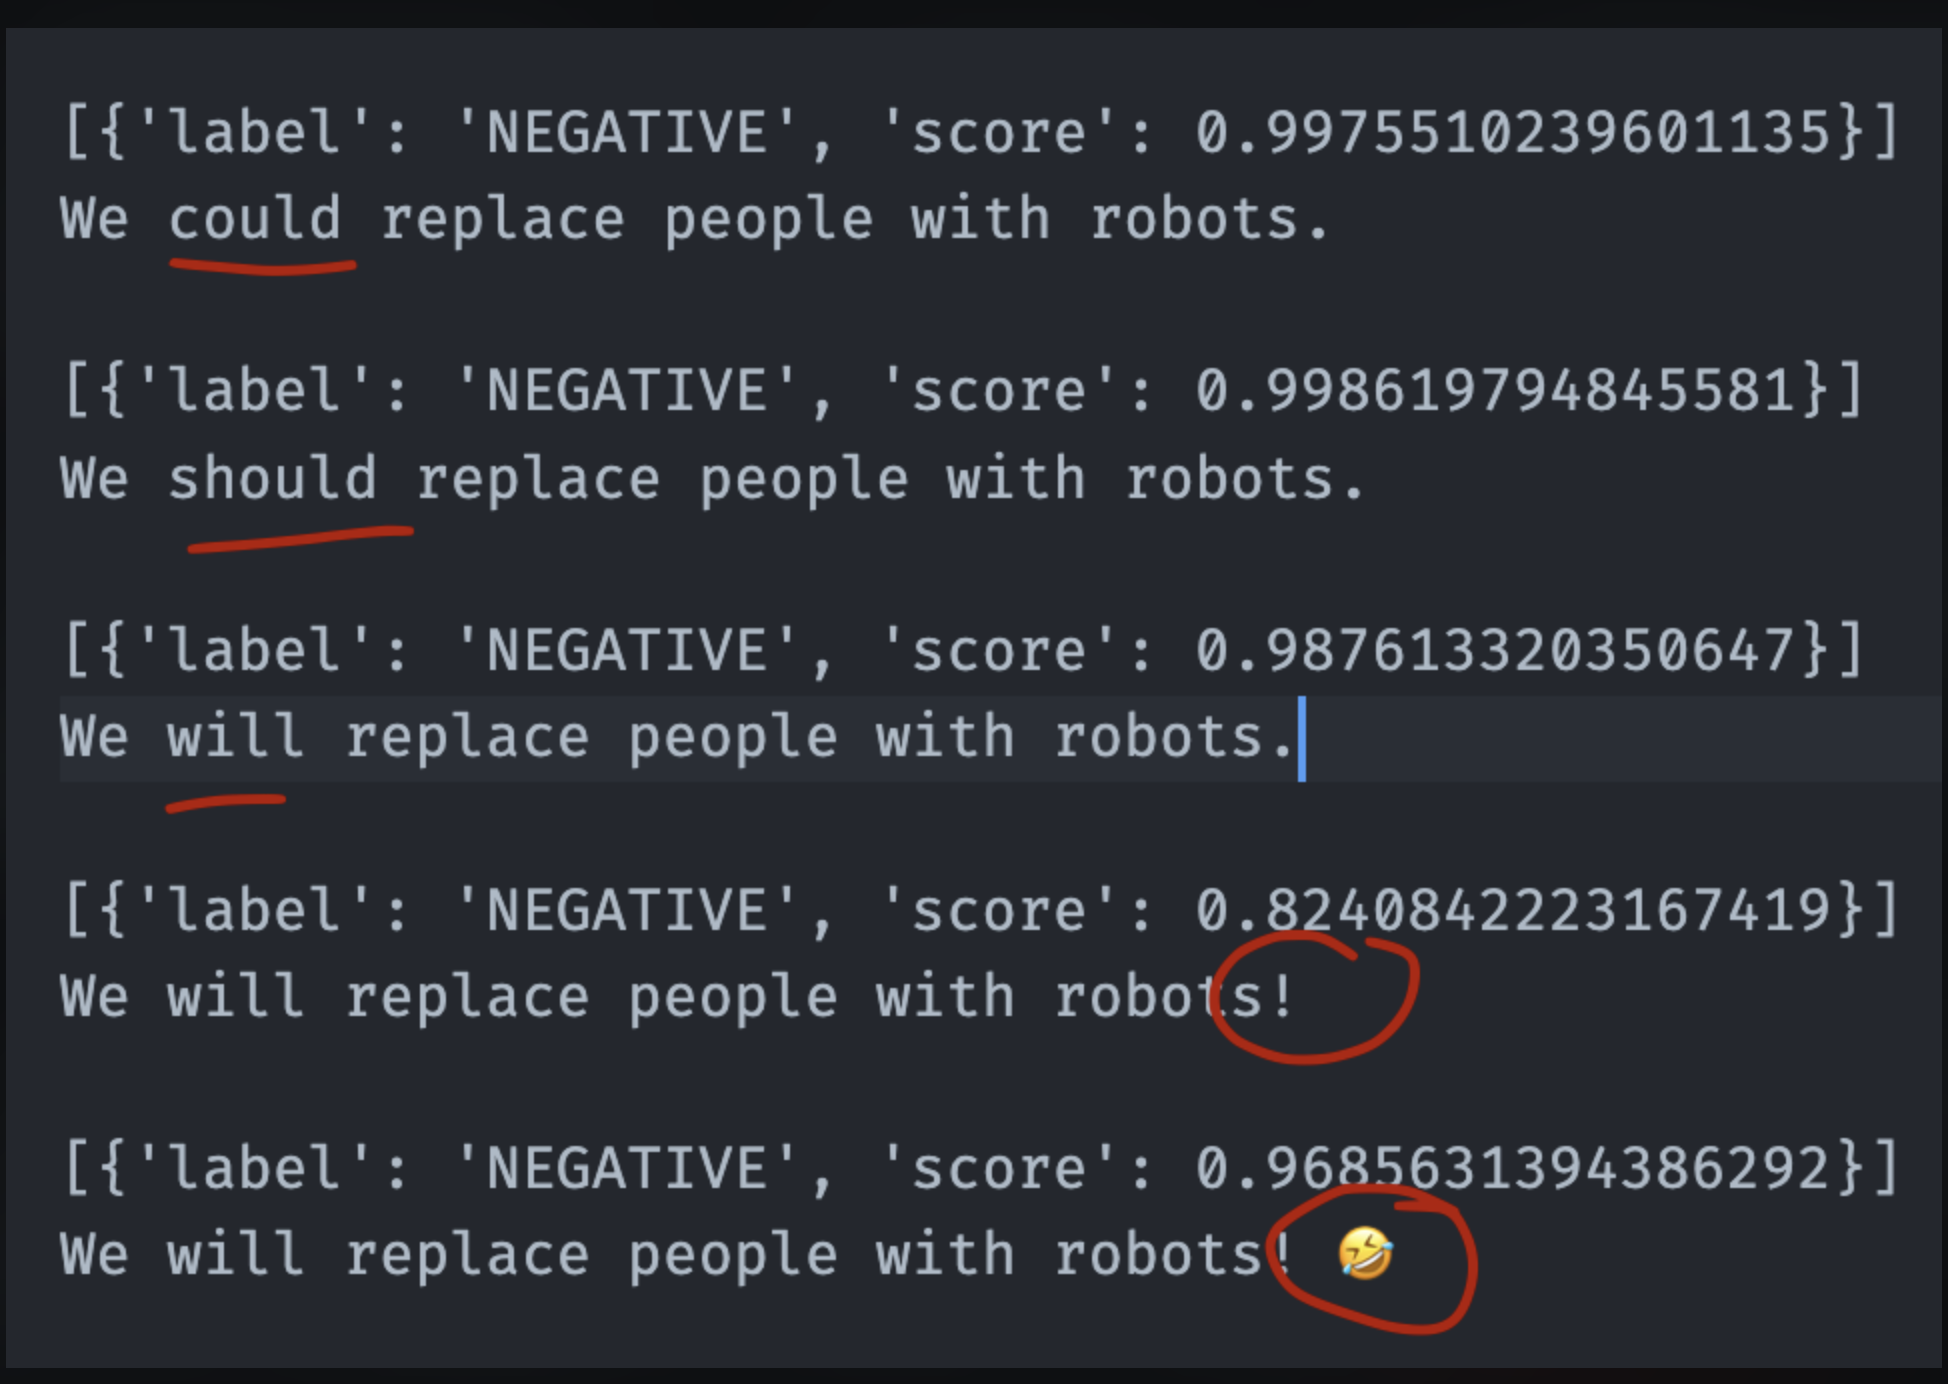
